In [1]:
#CREATE MERGE LAYER IN MODEL
from keras.layers import Input, Convolution2D, merge
from keras.models import Model
from IPython.display import SVG
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

/home/savath/.virtualenvs/wazir/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
INPUT_LAYER = Input((32, 32, 3))
C1 = Convolution2D(10, 3, 3, border_mode='same',name='CONV_LAYER_1')(INPUT_LAYER)
C2 = Convolution2D(10, 3, 3, border_mode='same',name='CONV_LAYER_2')(C1)
merged1 = merge([C2, C1], mode='sum',name='MERGED_C1C2_LAYERS')
C3 = Convolution2D(10, 3, 3, border_mode='same',name='CONV_LAYER_3')(merged1)
C4 = Convolution2D(10, 3, 3, border_mode='same',name='CONV_LAYER_4')(C3)
C5 = Convolution2D(10, 3, 3, border_mode='same',name='CONV_LAYER_5')(C4)
merged2 = merge([C1,C2,C3,C4, C5], mode='sum',name='MERGED_C1C2C3C4C5_LAYERS')
C6 = Convolution2D(10, 3, 3, border_mode='same',name='CONV_LAYER_6')(merged2)
model = Model(input=INPUT_LAYER, output=C6)

/home/savath/.virtualenvs/wazir/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), name="CONV_LAYER_1", padding="same")`
  
/home/savath/.virtualenvs/wazir/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), name="CONV_LAYER_2", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/savath/.virtualenvs/wazir/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  after removing the cwd from sys.path.
/home/savath/.virtualenvs/wazir/lib/python3.5/site-packages/keras/legacy/layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`,

In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
CONV_LAYER_1 (Conv2D)           (None, 32, 32, 10)   280         input_1[0][0]                    
__________________________________________________________________________________________________
CONV_LAYER_2 (Conv2D)           (None, 32, 32, 10)   910         CONV_LAYER_1[0][0]               
__________________________________________________________________________________________________
MERGED_C1C2_LAYERS (Merge)      (None, 32, 32, 10)   0           CONV_LAYER_2[0][0]               
                                                                 CONV_LAYER_1[0][0]               
__________

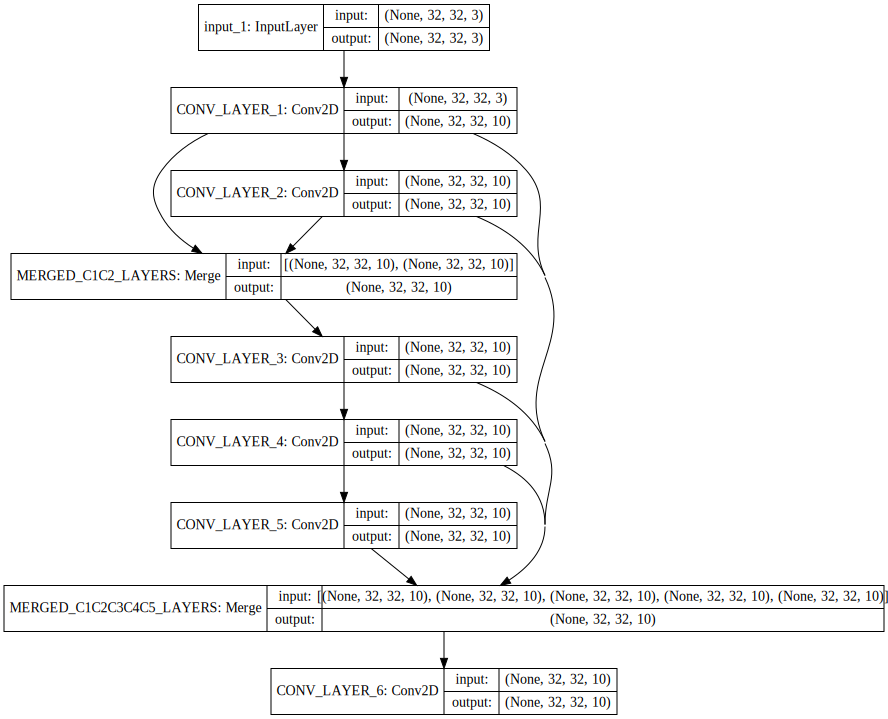

In [4]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [5]:
plot_model(model, to_file='MERGELAYER.png')